# Was court harsher against non-white complanaint vs. white police officer during Republican time?

Sunwoo Kim

## Summary of Findings

### Introduction
This datasets show when the complain was recieved, who the police office of that case was(their rank, gender, ethnicity, age. etc), and who the complainant was(their age, gender, ethnicity. etc). This also explains how the case went with the result description. Using the time it was reicieved, I figured out which administration it was under and see how the outcome has changed for white officer vs. non-white complainant cases. 

### Cleaning and EDA
First, I replaced all the 'missing' values for 'complainant_ethinicity' and 'complainant_gender' which was represented as 'Unknown' and 'Not described' to np.nan. I looked into the year the case was recieved and see if it was under Republican or Democrat administration.(1993-2000 and 2009-2016 was when Democrat president held presidency) and added new column name 'party' to the dataframe. Then, I looked through the 'outcome-description' columns and unless if it no summon or arrest was imposed or the case was against PO(police officer), I marked as the case that it was against the complainant. Using this information, I added new column called 'against complainant' where 1 indicate True and 0 indicate False(if this column is 1, than the case outcome was against complainant).

### Assessment of Missingness
Since we are looking thorugh the case white officer vs. non-white complainant, I thought acessing missing ness of 'complainant_ethnicity' column was important. I was curious if this column was dependent to the column 'mos_etnicity' so I calculated tvd of distribution of 'mos_ethnicity' when 'complainant_ethnicity' is null or not. Then, I ran permutation test to calculate the p-value and p-value turned out to be extremely low. Therefore, I concluded that missingness of 'complainant_ethnicity' is dependent on 'mos_etnicity' so this missingness is MAR.

### Hypothesis Test
null hyp: The court decision was equally likey to be against non-white complainant when they sued white police officer whether it was under Democrat or Republican administration.
Alt hyp:The court decision was more likely to be against non-white complainant when they sued white police officer during republican time compared to Democrat time.
We set our alpha as 0.05(conventionally used)
Our p-value is 0.25 so we fail to reject our null hypothesis.

## Code

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import requests
import bs4

In [2]:
comps=pd.read_csv('allegations_202007271729.csv')
comps.head()

,unique_mos_id,first_name,last_name,command_now,shield_no,complaint_id,month_received,year_received,month_closed,year_closed,...,mos_age_incident,complainant_ethnicity,complainant_gender,complainant_age_incident,fado_type,allegation,precinct,contact_reason,outcome_description,board_disposition
0,10004,Jonathan,Ruiz,078 PCT,8409,42835,7,2019,5,2020,...,32,Black,Female,38.0,Abuse of Authority,Failure to provide RTKA card,78.0,Report-domestic dispute,No arrest made or summons issued,Substantiated (Command Lvl Instructions)
1,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Discourtesy,Action,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
2,10007,John,Sears,078 PCT,5952,24601,11,2011,8,2012,...,24,Black,Male,26.0,Offensive Language,Race,67.0,Moving violation,Moving violation summons issued,Substantiated (Charges)
3,10007,John,Sears,078 PCT,5952,26146,7,2012,9,2013,...,25,Black,Male,45.0,Abuse of Authority,Question,67.0,PD suspected C/V of violation/crime - street,No arrest made or summons issued,Substantiated (Charges)
4,10009,Noemi,Sierra,078 PCT,24058,40253,8,2018,2,2019,...,39,NaN,NaN,16.0,Force,Physical force,67.0,Report-dispute,Arrest - other violation/crime,Substantiated (Command Discipline A)


### Cleaning and EDA

In [3]:
def det(x):
    dem=range(1993,2001)
    dem2=range(2009,2017)
    if x in dem or x in dem2:
        return 'Democrat'
    return 'Republican'

In [4]:
comps['party']=comps['year_received'].apply(det)
comps['complainant_ethnicity']=comps['complainant_ethnicity'].replace('Unknown',np.nan)
comps['complainant_gender']=comps['complainant_gender'].replace('Not described',np.nan)

In [5]:
# 1 if it was against the complainant
result={'No arrest made or summons issued':0,'Moving violation summons issued':1,\
'Arrest - other violation/crime':1, 'Summons - other violation/crime':1, 'Arrest - OGA':1,\
'Other VTL violation summons issued':1, 'Arrest - resisting arrest':1,\
'Arrest - disorderly conduct':1, 'Arrest - assault (against a PO)':0,\
'Summons - disorderly conduct':1, 'Juvenile Report':1,\
'Parking summons issued':1, 'Disorderly-Conduct/Arr/Summons':1,\
'Assault/Arrested':1, 'Other Summons Claimed or Issued':1,\
'Arrest - harrassment (against a PO)':0, 'Arrest on Other Charge':1,\
'Obstruct-Govt-Admin/Arrested':1,\
'Traffic Summons Claimed or Issued':1, 'Resisting Arrest/Arrested':1,\
'Harrassment/Arrested/Summons':1, 'Summons - OGA':1,\
'Summons - harrassment (against a PO)':0}
comps['against complainant']=comps['outcome_description'].map(result)

In [6]:
comps.groupby('complainant_ethnicity').mean()['against complainant']

complainant_ethnicity
American Indian    0.468750
Asian              0.573585
Black              0.608233
Hispanic           0.636420
Other Race         0.573117
Refused            0.521236
White              0.548306
Name: against complainant, dtype: float64

In [7]:
comps.groupby('mos_ethnicity').mean()['against complainant']

mos_ethnicity
American Indian    0.750000
Asian              0.613811
Black              0.581504
Hispanic           0.609048
White              0.578624
Name: against complainant, dtype: float64

<BarContainer object of 7 artists>

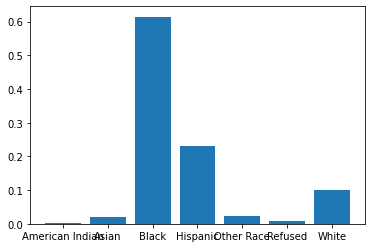

In [8]:
a=comps.groupby('complainant_ethnicity').count()['unique_mos_id']
a=a/a.sum()
plt.bar(sorted(comps['complainant_ethnicity'].dropna().unique()),\
        height=a)

<BarContainer object of 5 artists>

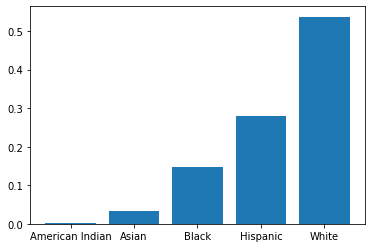

In [9]:
a=comps[comps['complainant_ethnicity']!='White'].groupby('mos_ethnicity').count()['unique_mos_id']
a=a/a.sum()
plt.bar(sorted(comps['mos_ethnicity'].dropna().unique()),\
        height=a)

<BarContainer object of 7 artists>

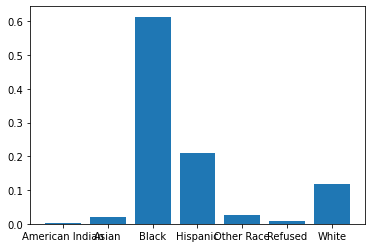

In [10]:
a=comps[(comps['mos_ethnicity']=='White')&(comps['party']=='Republican')].groupby('complainant_ethnicity').count()['unique_mos_id']
a=a/a.sum()
plt.bar(sorted(comps['complainant_ethnicity'].dropna().unique()),\
        height=a)

<BarContainer object of 5 artists>

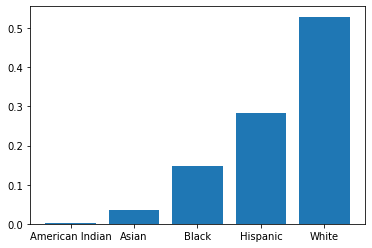

In [11]:
a=comps[(comps['complainant_ethnicity']!='White')&(comps['party']=='Republican')].groupby('mos_ethnicity').count()['unique_mos_id']
a=a/a.sum()
plt.bar(sorted(comps['mos_ethnicity'].dropna().unique()),\
        height=a)

### Assessment of Missingness

<BarContainer object of 5 artists>

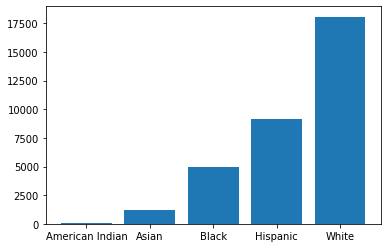

In [12]:
plt.bar(sorted(comps['mos_ethnicity'].dropna().unique()),\
        height=comps.groupby('mos_ethnicity').count()['unique_mos_id'])

<BarContainer object of 5 artists>

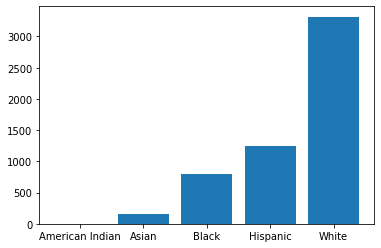

In [13]:
plt.bar(sorted(comps['mos_ethnicity'].dropna().unique()),\
        height=comps[comps['complainant_ethnicity'].isna()].groupby('mos_ethnicity').count()['unique_mos_id'])

In [14]:
totdist=comps.groupby('mos_ethnicity').count()['unique_mos_id']
totdist=totdist/totdist.sum()
nadist=comps[comps['complainant_ethnicity'].isna()].groupby('mos_ethnicity').count()['unique_mos_id']
nadist=nadist/nadist.sum()
tvd1=abs(nadist-totdist).sum()/2
tvd1

0.060542435654836156

In [15]:
out=[]
shuffled = comps.copy();
for i in range(1000):
    shuffled['mos_ethnicity'] = np.random.permutation(shuffled['mos_ethnicity'])
    temp=shuffled[shuffled['complainant_ethnicity'].isna()].groupby('mos_ethnicity').count()['unique_mos_id']
    temp=temp/temp.sum()
    out.append(abs(temp-totdist).sum()/2)
pval=np.mean(np.array(out)>tvd1)
pval

0.0

### Hypothesis Testing

In [16]:
stat=np.mean(comps['against complainant'])
stat

0.5887934658579065

In [17]:
demstat=np.mean(comps[(comps['mos_ethnicity']=='White')&(comps['complainant_ethnicity']!='White')\
                      &(comps['party']=='Democrat')]['against complainant'])
demstat

0.5770573004615558

In [18]:
repstat=np.mean(comps[(comps['mos_ethnicity']=='White')&(comps['complainant_ethnicity']!='White')\
                      &(comps['party']=='Republican')]['against complainant'])
repstat

0.5840531561461794

In [19]:
shuffle=comps[(comps['mos_ethnicity']=='White')&(comps['complainant_ethnicity']!='White')]

In [20]:
teststat=repstat-demstat
out=[]
for i in range(1000):
    temp=shuffle['against complainant'].sample(frac=1).reset_index(drop=True)
    shuffle = (
        shuffle
        .assign(**{'shuffled': temp})
    )
    temp1=np.mean(shuffle[shuffle['party']=='Democrat']['shuffled'])
    temp2=np.mean(shuffle[shuffle['party']=='Republican']['shuffled'])
    out.append(temp2-temp1)
    

In [21]:
pval=np.mean(np.array(out)>=teststat)
pval

0.252